Реалізація нейронної мережі

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

from IPython.display import display, Markdown, Math

seed = 42

In [47]:
class NeuralNetwork:
    """
    N-layer neural network mathematic model with sigmoid activation function
    """

    def __init__(self, npl, add_bias=True):
        """
        Init starting values, first step
        
        Args:
            npl: Neuron-per-Layer (i.e. 2-3-1 == [2, 3, 1])
            add_bias: To add additional weight to itself on every neuron
        """
        self._npl = npl
        self.add_bias = add_bias
        # First_neuron_number . depends on bias
        self.one_or_zero = 1 if add_bias else 0
        # Add bias neuron if it needed
        self._inputs = []
        self._result = []
        
        self.weights = []
        for i in range(len(npl)-1):
            w = np.random.default_rng(seed).uniform(
                low=-1.0,
                high=1.0,
                size=(npl[i]+self.one_or_zero)*npl[i+1],
            ).round(3).reshape((npl[i]+self.one_or_zero, npl[i+1]))
            self.weights.append(w)
            
        self.neurons = []
        for i in range(len(npl)):
            self.neurons.append(
                np.concatenate(([1], np.empty(npl[i])))
                if self.add_bias else
                np.empty(npl[i])
            )
        self.epoch_history = []  # same as y_i
        self.error_history = []  # same as dn_i
        

    def sigm(self, x):
        """
        Sigmoidal activation function
        """
        return 1 / (1 + np.exp(-x))

    def sigm_der(self, w):
        """
        Args:
            w: the previous output value of the neuron
        """
        return w * (1 - w)

    def _step_forward(self):
        """
        Make one calculation forward through all NN
        """
        for i in range(1, len(self._npl)):
            self.neurons[i][self.one_or_zero:] = self.sigm(
                self.neurons[i-1] @ self.weights[i-1])
            
        self.epoch_history.append(self.neurons[-1][self.one_or_zero:])
        self.error_history.append(
            np.abs((self._result - self.epoch_history[-1]) / self._result)
        )

    def _back_propagate(self, learning_rate):
        """
        Correct previous iteration
        """
        l = learning_rate
        last_delta_w = (self.neurons[-1][self.one_or_zero:]
                        - self._result)
                    * self.sigm_der(self.neurons[-1][self.one_or_zero:])
        
        for i in range(len(self._npl) - 2, -1, -1):
            correction = np.transpose([self.neurons[i]]) @ ([last_delta_w]) * l
            self.weights[i] -= correction
            last_delta_w = (
                (last_delta_w @ self.weights[i].T)
                * self.sigm_der(self.neurons[i])
            )[self.one_or_zero:]

    def train(self,
              inputs,
              outputs,
              acceptable_error=0.01,
              learning_rate=0.1,
              max_epoch_iteration=5000):
        """
        Train function
        Make forward step and correct weights.
        Loop that untill error will be small enough.
        Limit maximum number of epochs.
        """
        i = 1
        inp_outps = list(zip(inputs, outputs))
        enought = False
        while (i < max_epoch_iteration) and (not enought):
            for inp, outp in inp_outps:
                self.neurons[0][self.one_or_zero:] = np.array(inp)
                self._result = np.array(outp)
                self._step_forward()
                self._back_propagate(learning_rate)
            
            if self.error_history[-1] <= acceptable_error:
                enought = True
                break
            i += 1
            np.random.shuffle(inp_outps)
        return i
    
    def predict(self, input_vector):
        """
        Predict input vector with current weights
        """
        self.neurons[0][self.one_or_zero:] = np.array(input_vector)
        self._step_forward()
        return self.neurons[-1][self.one_or_zero:]

IndentationError: unexpected indent (3820944900.py, line 75)

In [48]:
def visualize(NN, test_predict, inp_outps_count=1):
    history = pd.DataFrame({
        "$$y_i$$": NN.epoch_history[::inp_outps_count],
        "$$dn_i$$": NN.error_history[::inp_outps_count],
    })
    history.index += 1
    display(Markdown("## Результати роботи програми на кожній ітерації"))
    display(history)

    plt.figure(figsize=(11,5))
    plt.plot(history.index, history["$$dn_i$$"])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    display(Markdown("## Похибка навчання на кожній ітерації"))
    plt.show()

    probability = NN.predict(test_predict)[0]
    display(Markdown("## Режим розпізнавання"))
    display(Markdown(f"Вхідні дані: {test_predict}"))
    display(Markdown(f"Результат: {probability}"))

_Частина 2_

Завдання: розробити програмне забезпечення для реалізації елементарного
двошарового персептрону із структурою 1-1-1.

Передбачити режим навчання
на одному навчальному прикладі та режим розпізнавання.


In [49]:
perceptron2 = NeuralNetwork([1, 1, 1], add_bias=False)

Навчальні приклади

In [50]:
inputs, outputs = [[2]], [[0.5]]

Навчання

In [51]:
epoch_number = perceptron2.train(inputs,
                                 outputs,
                                 acceptable_error=0.1,
                                 learning_rate=1,
                                 max_epoch_iteration=1000)
print("Epoch number", epoch_number)
print("Final error", perceptron2.error_history[-1])

Epoch number 22
Final error [0.09837481]


## Результати роботи програми на кожній ітерації

,$$y_i$$,$$dn_i$$
1,[0.5491874071585257],[0.20252648954346442]
2,[0.5491874071585257],[0.19551503908246826]
3,[0.5491874071585257],[0.18876371496398003]
4,[0.5491874071585257],[0.18226253845539464]
5,[0.5491874071585257],[0.17600176294364878]
6,[0.5491874071585257],[0.1699719096024208]
7,[0.5491874071585257],[0.16416379316254948]
8,[0.5491874071585257],[0.1585685394556935]
9,[0.5491874071585257],[0.15317759619206184]
10,[0.5491874071585257],[0.14798273823601993]


## Похибка навчання на кожній ітерації

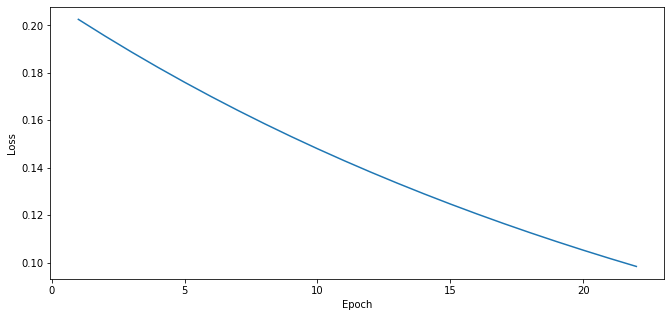

## Режим розпізнавання

Вхідні дані: [2]

Результат: 0.5475603199708622

In [52]:
visualize(perceptron2, [2])

_Частина 3_

Завдання: розробити програмне забезпечення для реалізації двошарового персептрону із структурою 2-3-1.

Передбачити режим навчання «ON-LINE» та режим розпізнавання.

Піддослідна функція $х_1+х_2=у$

Generate train data

In [53]:
def gen_train(number):
    for i in range(number):
        x1 = round(np.random.default_rng().uniform(low=0.0, high=1.0), 3)
        y = round(np.random.default_rng().uniform(low=0, high=1.0), 3)
        x2 = round(y-x1, 3)
        yield [x1, x2], y
    
inputs, outputs = [], []
for i, j in gen_train(100):
    inputs.append(i)
    outputs.append([j])
    
print(*list(zip(inputs, outputs)), sep='\n')

([0.281, 0.573], [0.854])
([0.47, 0.26], [0.73])
([0.326, -0.231], [0.095])
([0.25, 0.259], [0.509])
([0.437, 0.013], [0.45])
([0.736, -0.306], [0.43])
([0.094, 0.427], [0.521])
([0.158, 0.571], [0.729])
([0.687, -0.122], [0.565])
([0.446, 0.135], [0.581])
([0.599, -0.141], [0.458])
([0.484, 0.48], [0.964])
([0.128, 0.818], [0.946])
([0.555, 0.441], [0.996])
([0.578, -0.069], [0.509])
([0.437, -0.183], [0.254])
([0.788, -0.399], [0.389])
([0.509, 0.402], [0.911])
([0.798, -0.382], [0.416])
([0.679, 0.264], [0.943])
([0.927, -0.145], [0.782])
([0.691, 0.101], [0.792])
([0.729, 0.182], [0.911])
([0.314, -0.193], [0.121])
([0.646, -0.553], [0.093])
([0.384, 0.012], [0.396])
([0.625, 0.005], [0.63])
([0.359, -0.046], [0.313])
([0.06, 0.654], [0.714])
([0.812, -0.111], [0.701])
([0.327, -0.095], [0.232])
([0.197, 0.711], [0.908])
([0.828, -0.129], [0.699])
([0.026, 0.842], [0.868])
([0.683, -0.528], [0.155])
([0.394, 0.391], [0.785])
([0.195, 0.348], [0.543])
([0.705, -0.58], [0.125])
([0.8

Train process. Create NN

In [54]:
perceptron3 = NeuralNetwork([2, 3, 1], add_bias=True)

epoch_number = perceptron3.train(inputs, outputs, acceptable_error=0.01, learning_rate=1, max_epoch_iteration=10000)
print("Epoch number", epoch_number)
print("Final error", perceptron3.error_history[-1])

Epoch number 17
Final error [0.00619811]


Predict

## Результати роботи програми на кожній ітерації

,$$y_i$$,$$dn_i$$
1,[0.7145435556709445],[0.12910623305468272]
2,[0.7145435556709445],[0.025390172167080918]
3,[0.7145435556709445],[6.856611490642613]
4,[0.7145435556709445],[0.369024972400088]
5,[0.7145435556709445],[0.4955458310401903]
...,...,...
1696,[0.7145435556709445],[0.07692118833498275]
1697,[0.7145435556709445],[0.009617846501184845]
1698,[0.7145435556709445],[0.07343282714203243]
1699,[0.7145435556709445],[0.05928317302937366]


## Похибка навчання на кожній ітерації

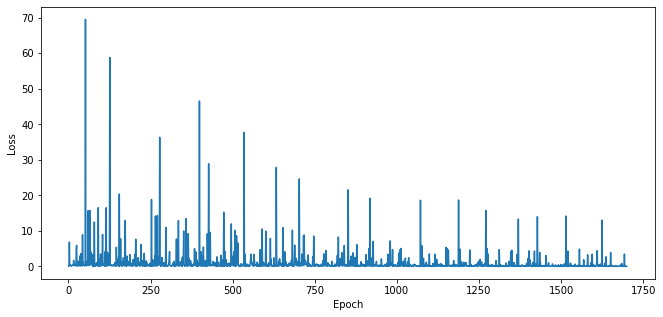

## Режим розпізнавання

Вхідні дані: [0.094, 0.427]

Результат: 0.5880968907372756

In [55]:
visualize(perceptron3, inputs[6])

Visualise output

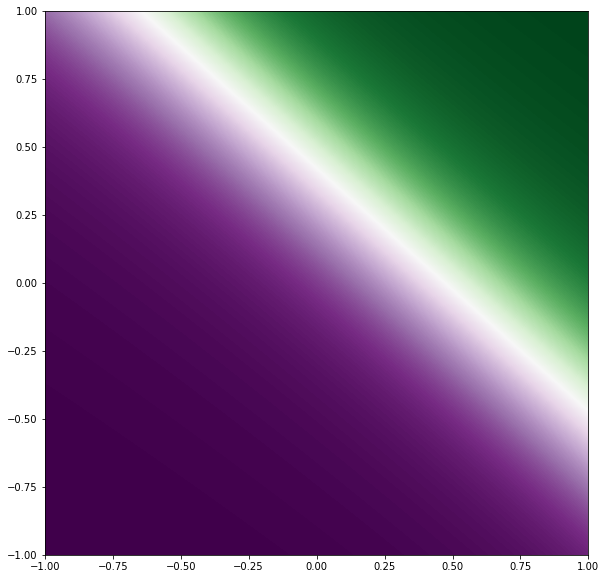

In [56]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
yy = np.empty(xx1.shape)
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        yy[i][j] = perceptron3.predict([xx1[i][j], xx2[i][j]])
        
# clev = np.arange(0, 1,.001)
clev = np.arange(yy.min(),yy.max(),.001)
h = plt.contourf(xx1, xx2, yy, clev, cmap='PRGn')
plt.axis('scaled')
plt.show()